In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

df = pd.read_csv('./Resources/bigCleanData.csv')
df.head()

,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passangers,Seats,Percent Full,Fly Date,Month,Year
0,MHK,"Manhattan, KS",122049,AMW,"Ames, IA",86219,254.0,1,21,30,0.70,200810,10,2008
1,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,22,41,396,0.10,199011,11,1990
2,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,19,88,342,0.26,199012,12,1990
3,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,4,11,72,0.15,199010,10,1990
4,MFR,"Medford, OR",147300,RDM,"Bend, OR",76034,156.0,1,0,18,0.00,199002,2,1990


In [12]:
# Remove where two columns are equal, this step may be skipped
# New question: how may airports have flights originating and arriving at themselves?
df = df[df['Destination Airport'] != df['Origin Airport']]

#### Get Route Frequency and Count of Unique Routes

In [20]:
#Count of unique routes, summing the value in the Flights column (number of flights in the given month)
uniqueRoutes = df.groupby(['Origin Airport', 'Destination Airport'])['Flights'].sum().reset_index()
uniqueRoutes.head()

,Origin Airport,Destination Airport,Flights
0,1B1,BDL,1
1,ABE,ACT,1
2,ABE,ACY,1
3,ABE,ADS,1
4,ABE,AGS,2


In [21]:
#Total number of unique routes
uniqueRoutes.shape[0]

36449

#### Pie Chart With Dest Code

In [31]:
#Get count of each occurance of a destination code
destFlights = df.groupby(['Destination Airport'])['Flights'].sum().reset_index()
destFlights.sort_values('Flights', inplace=True, ascending=False)
destFlights.head()

,Destination Airport,Flights
493,ORD,6896136
42,ATL,6544667
159,DFW,5987718
350,LAX,4096618
176,DTW,3448001


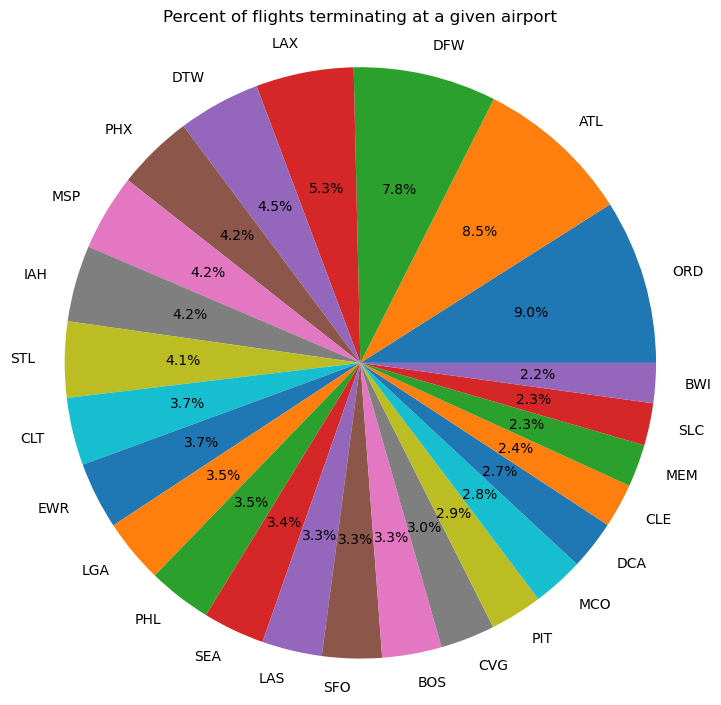

The above chart accounts for 57.08% of flights


In [55]:
numEntries = 25
shortened = destFlights.iloc[:numEntries]

plt.pie(shortened['Flights'], labels=shortened['Destination Airport'], autopct='%1.1f%%', radius=2)
plt.title("Percent of flights terminating at a given airport", y=1.4)
plt.show()

shortSum = shortened['Flights'].sum()
longSum = destFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

#### Pie Chart With Orig Code

In [60]:
origFlights = df.groupby(['Origin Airport'])['Flights'].sum().reset_index()
origFlights.sort_values('Flights', inplace=True, ascending=False)
origFlights.head()

,Origin Airport,Flights
481,ORD,6908333
40,ATL,6557923
155,DFW,5994470
345,LAX,4099817
173,DTW,3452572


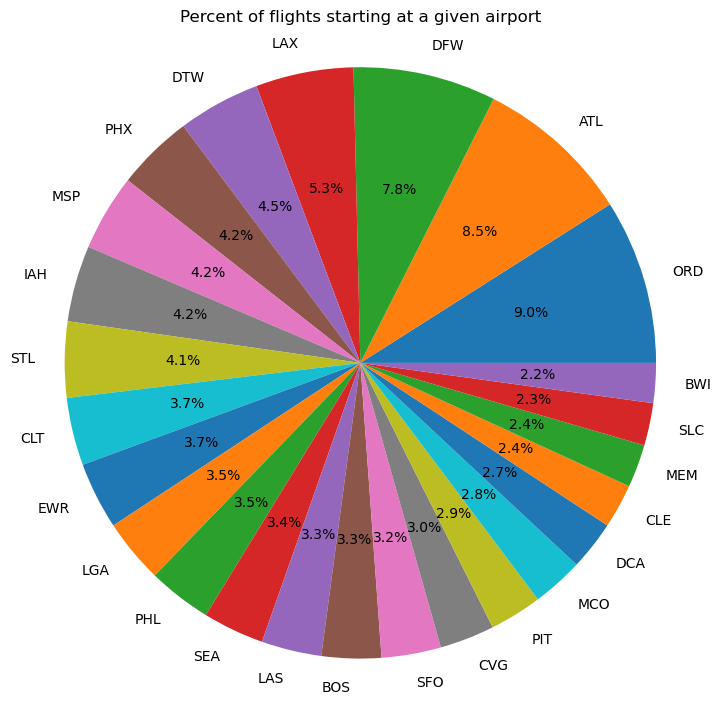

The above chart accounts for 57.15% of flights


In [57]:
numEntries = 25
shortened = origFlights.iloc[:numEntries]

plt.pie(shortened['Flights'], labels=shortened['Origin Airport'], autopct='%1.1f%%', radius=2)
plt.title("Percent of flights starting at a given airport", y=1.4)
plt.show()

shortSum = shortened['Flights'].sum()
longSum = origFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

#### Percent Full vs Route Frequency

In [61]:
avgPctFull = df.groupby(['Origin Airport', 'Destination Airport'])['Percent Full'].mean().reset_index()
avgPctFull.head()

,Origin Airport,Destination Airport,Percent Full
0,1B1,BDL,0.120
1,ABE,ACT,0.000
2,ABE,ACY,0.710
3,ABE,ADS,NaN
4,ABE,AGS,0.875


In [67]:
fullFrame = pd.merge(uniqueRoutes, avgPctFull, on=['Origin Airport', 'Destination Airport'])
withNA = len(fullFrame)
fullFrame.dropna(inplace=True)
droppedNA = len(fullFrame)

print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

There where 5761 flights with NA values, assumed to be empty flights


In [73]:
test = df[df['Percent Full'] > 1]
print(f'There are {len(test)} instances of flights running over capacity')

There are 268 instances of flights running over capacity


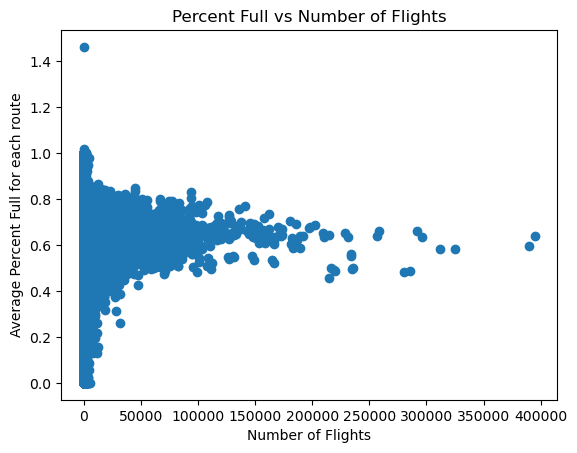

In [75]:
plt.scatter(fullFrame['Flights'], fullFrame['Percent Full'])
plt.xlabel('Number of Flights')
plt.ylabel('Average Percent Full for each route')
plt.title('Percent Full vs Number of Flights')
plt.show()

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(fullFrame['Flights'], fullFrame['Percent Full'])
print(pvalue)

print(f'p = {slope}f + {intercept}')

2.0538949477383423e-52
p = 1.496401907492728e-06f + 0.53154035577353


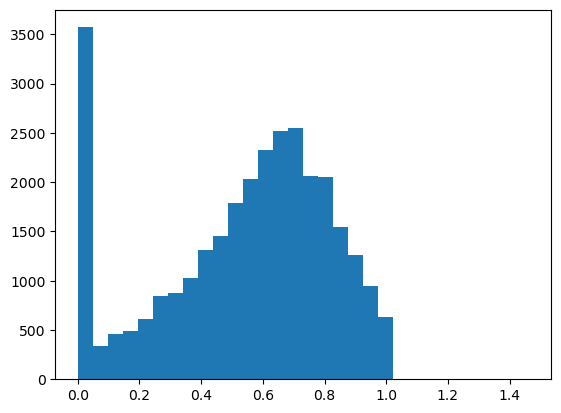

In [98]:
plt.hist(fullFrame[['Percent Full']], bins = 30)
plt.show()

#### Route Frequency vs Destination Population (E)

##### Shelved for now, running into odd issues with getting the population of the destination location

In [117]:
df2 = df.copy()
oriDest = 'Destination'

portCode = f'{oriDest} Airport'
coi = f'{oriDest} Population'

codeLookup = df2[[portCode, coi]].drop_duplicates(keep='first')
codeLookup = codeLookup.groupby(portCode)[coi].mean().reset_index()
codeLookup

,Destination Airport,Destination Population
0,1B1,61618.000000
1,ABE,742874.400000
2,ABI,155009.650000
3,ABQ,724727.300000
4,ABR,39415.235294
...,...,...
703,YKN,21710.000000
704,YNG,596641.800000
705,YUM,149640.300000
706,ZXX,221175.500000


In [123]:
#Column of interest will be abreviated to coi
dataOfInterest = pd.merge(uniqueRoutes, codeLookup, on=portCode)
dataOfInterest.tail()

,Origin Airport,Destination Airport,Flights,Destination Population
36444,YIP,PHD,1,91163.0
36445,YIP,PHT,1,31077.0
36446,YIP,SIK,1,40389.0
36447,YIP,TN6,3,37680.0
36448,YNG,RID,1,70163.0


In [125]:
withNA = len(dataOfInterest)
dataOfInterest.dropna(inplace=True)
droppedNA = len(dataOfInterest)

#No NA values found, skipping print statement
#print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

In [130]:
#dataOfInterest[coi].max()
dataOfInterest.sort_values(coi, ascending=False, inplace=True)
dataOfInterest

,Origin Airport,Destination Airport,Flights,Destination Population
36227,JFK,TSS,1657,37643011.75
35264,BDR,JRB,169,37643011.75
35265,EWR,JRB,1479,37643011.75
35266,JFK,JRB,4496,37643011.75
35267,JRA,JRB,6,37643011.75
...,...,...,...,...
34112,JNU,WFB,10,13198.75
34113,KTN,WFB,12412,13198.75
34114,MTN,WFB,1,13198.75
34115,SLB,WFB,1,13198.75


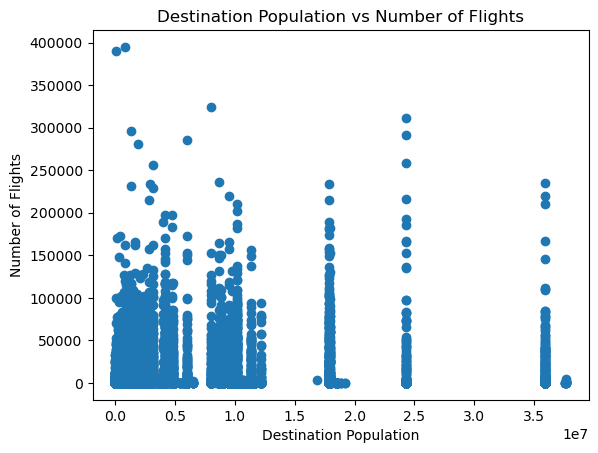

In [129]:
plt.scatter(dataOfInterest[coi], dataOfInterest['Flights'])
plt.ylabel('Number of Flights')
plt.xlabel(coi)
plt.title(f'{coi} vs Number of Flights')
plt.show()

#### Number of Passangers Flown per Year and Month

#### Big City Small City Correlation